
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
#!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
#print('File downloaded!')
file_name=('cov.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
#os.remove("WHO-COVID-19-global-data.csv")
#print("File Removed!")

File copied to DataFrame!


In [3]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [4]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28269,2020-01-03,GR,Greece,EURO,0,0,0,0
28270,2020-01-04,GR,Greece,EURO,0,0,0,0
28271,2020-01-05,GR,Greece,EURO,0,0,0,0
28272,2020-01-06,GR,Greece,EURO,0,0,0,0
28273,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [5]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28269,2020-01-03,0,0,0,0
28270,2020-01-04,0,0,0,0
28271,2020-01-05,0,0,0,0
28272,2020-01-06,0,0,0,0
28273,2020-01-07,0,0,0,0


#### Renaming columns

In [6]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28269,2020-01-03,0,0,0,0
28270,2020-01-04,0,0,0,0
28271,2020-01-05,0,0,0,0
28272,2020-01-06,0,0,0,0
28273,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [7]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28626,2020-12-25,873,134235,55,4442
28625,2020-12-24,934,133435,62,4384
28624,2020-12-23,853,132501,83,4322
28623,2020-12-22,526,131648,85,4239
28622,2020-12-21,588,131122,70,4154


#### Converting 'Date_reported' to datetime

In [8]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [9]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28626,2020-12-25,873,134235,55,4442
28625,2020-12-24,934,133435,62,4384
28624,2020-12-23,853,132501,83,4322
28623,2020-12-22,526,131648,85,4239
28622,2020-12-21,588,131122,70,4154
28621,2020-12-20,901,130534,58,4084
28620,2020-12-19,916,129633,96,4026
28619,2020-12-18,1155,128717,78,3948
28618,2020-12-17,1190,127562,85,3870
28617,2020-12-16,1199,126372,98,3785


#### Correcting the deviation of the day

In [10]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28626,2020-12-24,873,134235,55,4442
28625,2020-12-23,934,133435,62,4384
28624,2020-12-22,853,132501,83,4322
28623,2020-12-21,526,131648,85,4239
28622,2020-12-20,588,131122,70,4154


In [11]:
df_copy = df_copy.iloc[:-324]

In [12]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [13]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28593,2020-11-21,2309,90121,108,1527
28594,2020-11-22,1498,91619,103,1630
28595,2020-11-23,1387,93006,84,1714
28596,2020-11-24,2131,95137,101,1815
28597,2020-11-25,2151,97288,87,1902
28598,2020-11-26,2018,99306,99,2001
28599,2020-11-27,1981,101287,101,2102
28600,2020-11-28,1747,103034,121,2223
28601,2020-11-29,1193,104227,98,2321
28602,2020-11-30,1044,105271,85,2406


# New cases graph<a name="new_cases_graph"></a>

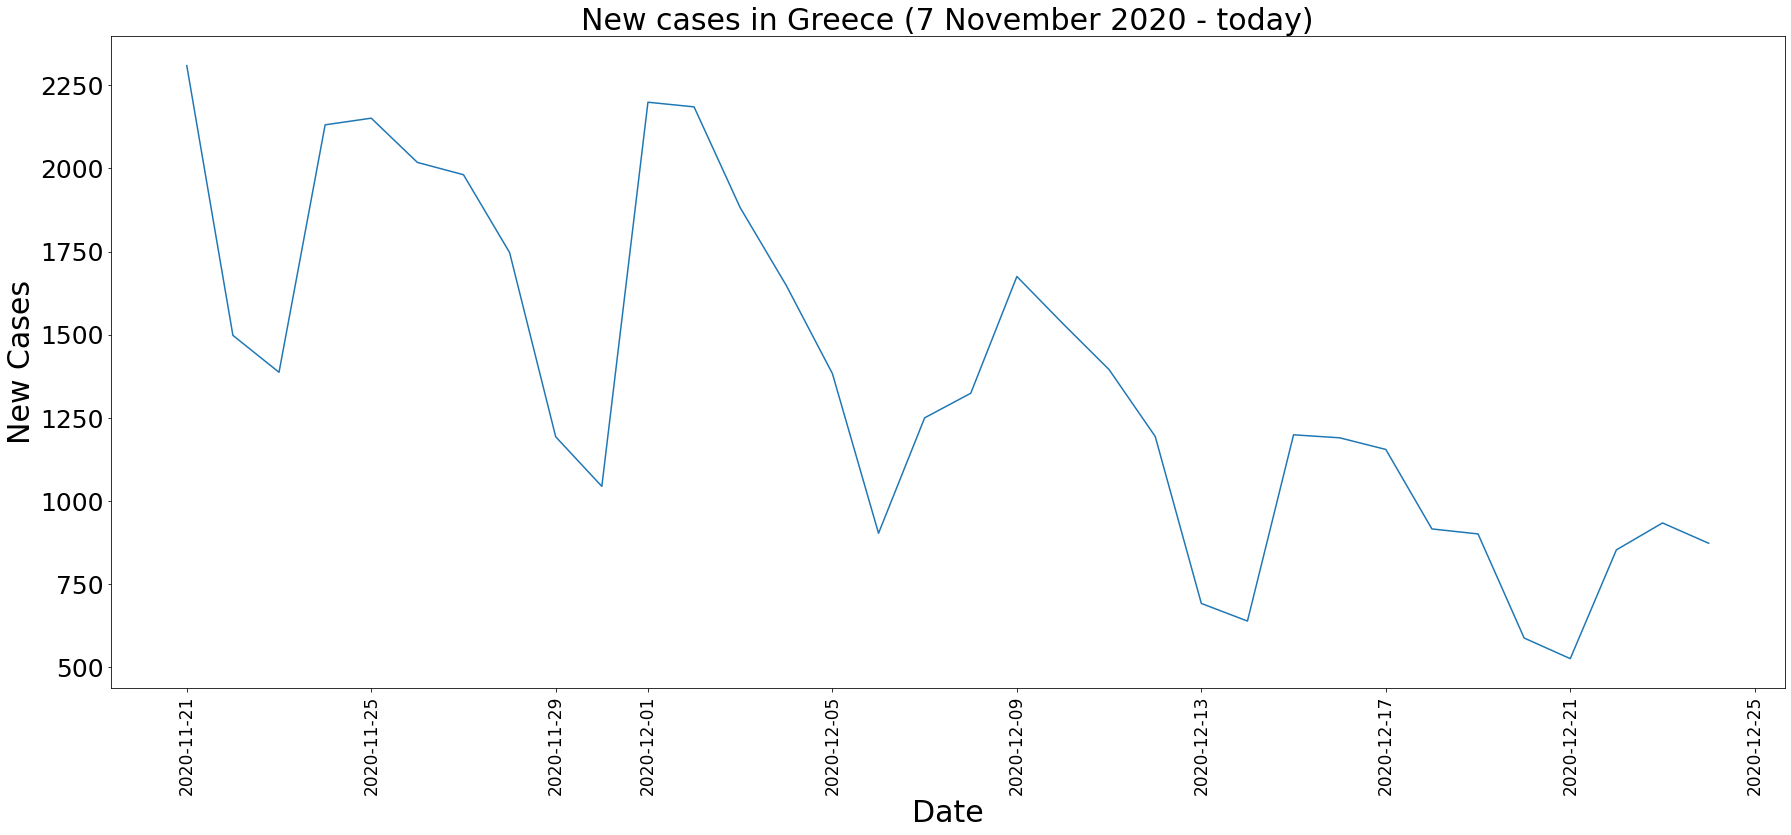

In [14]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

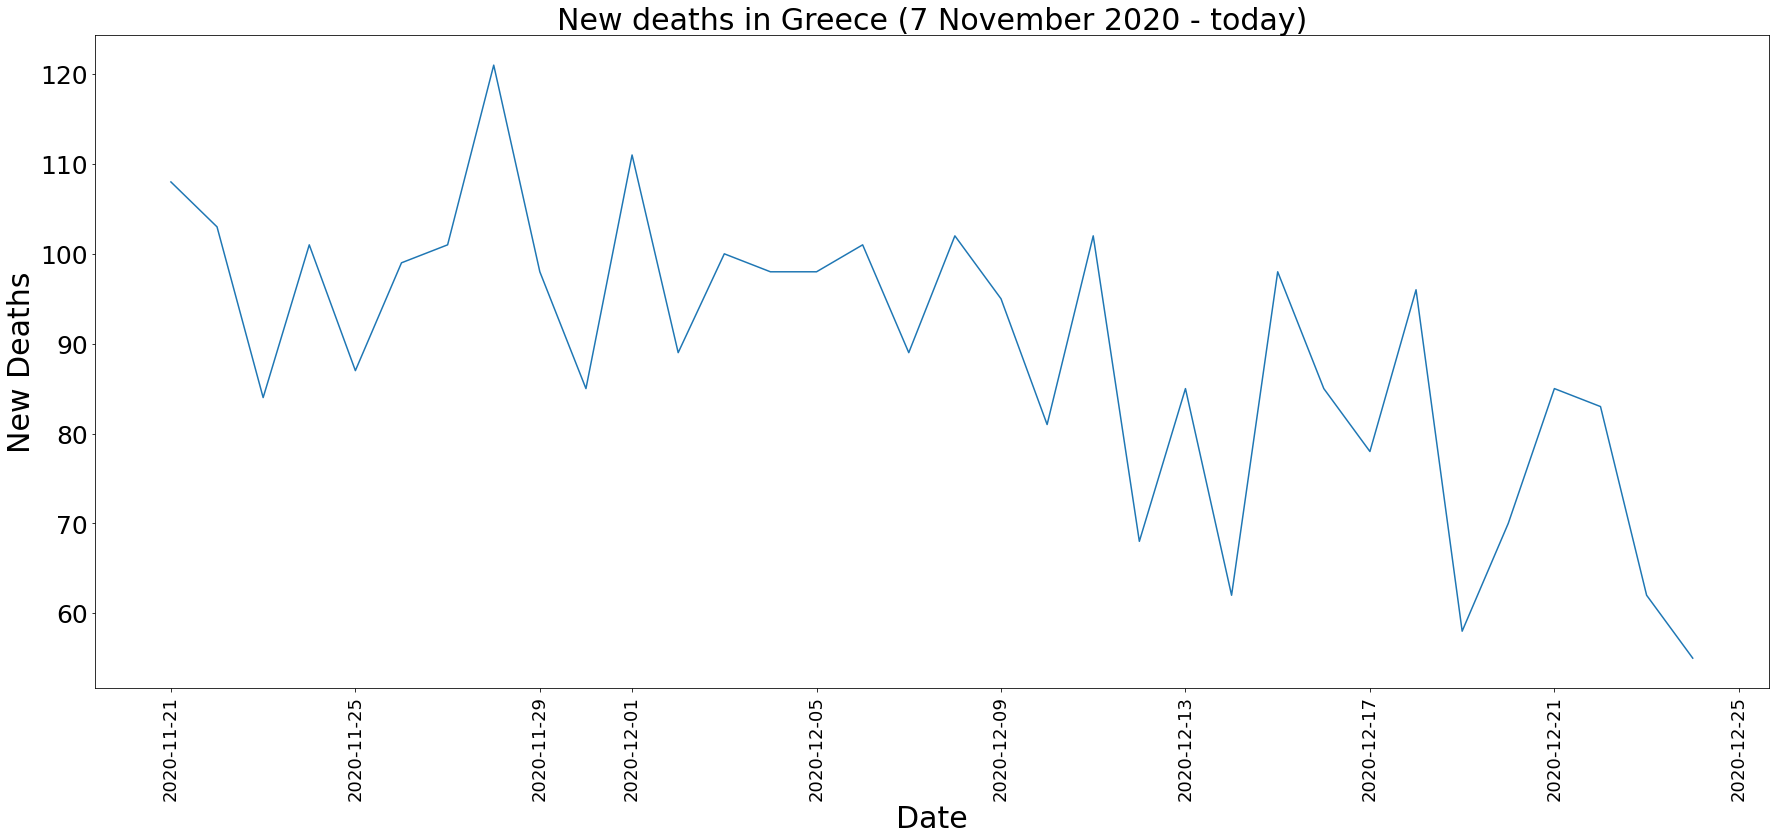

In [15]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

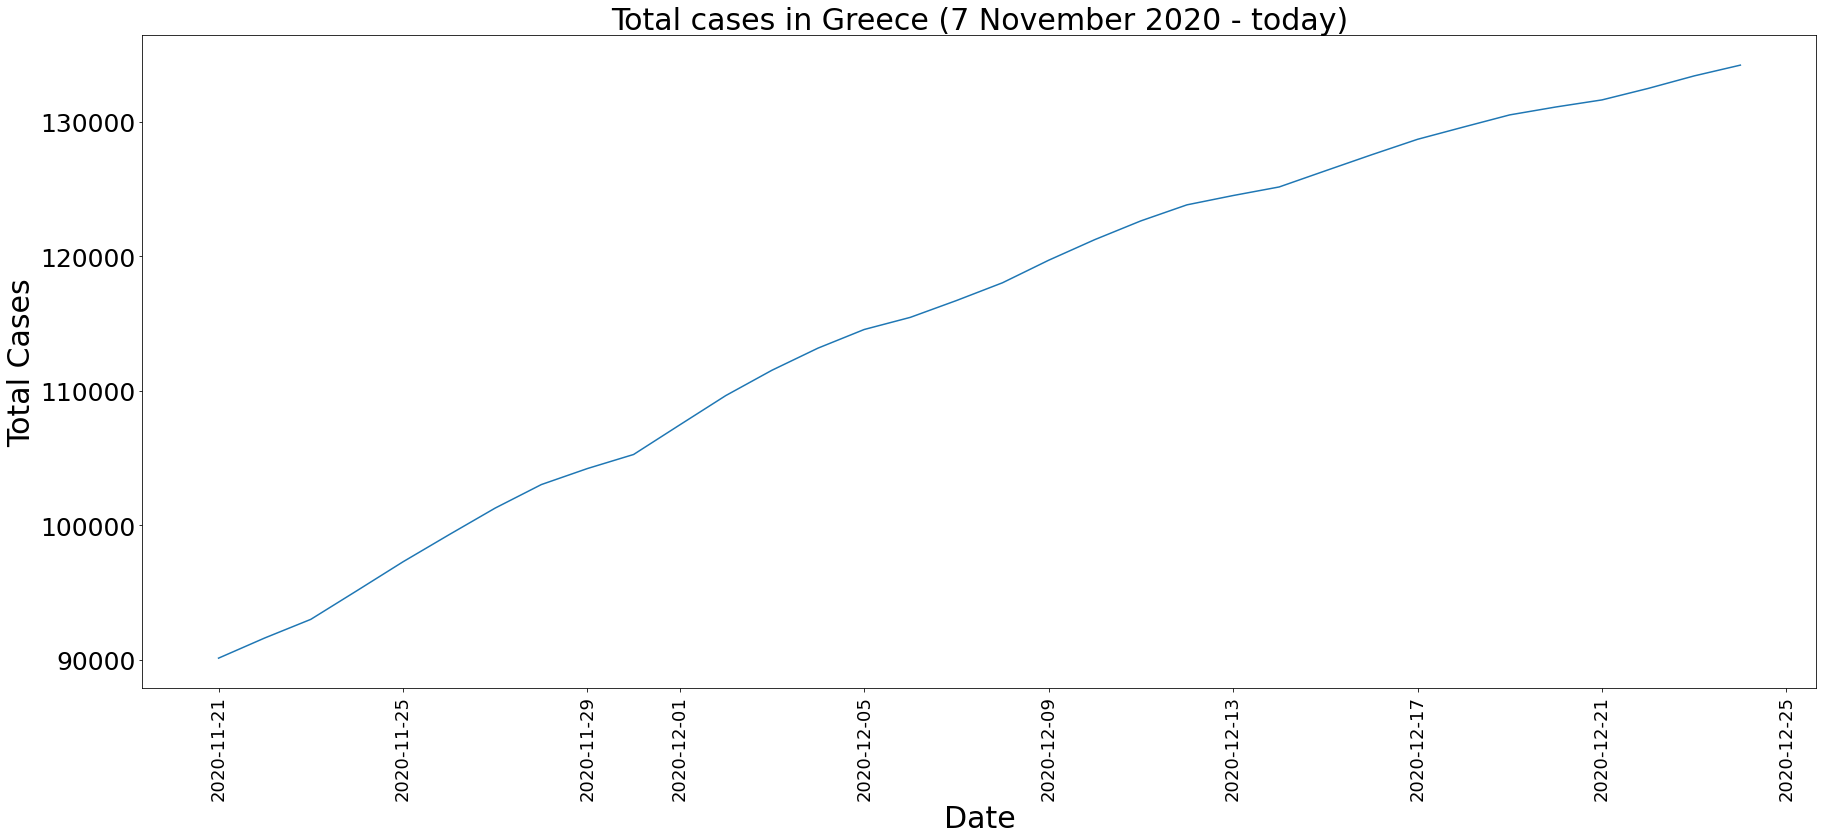

In [16]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

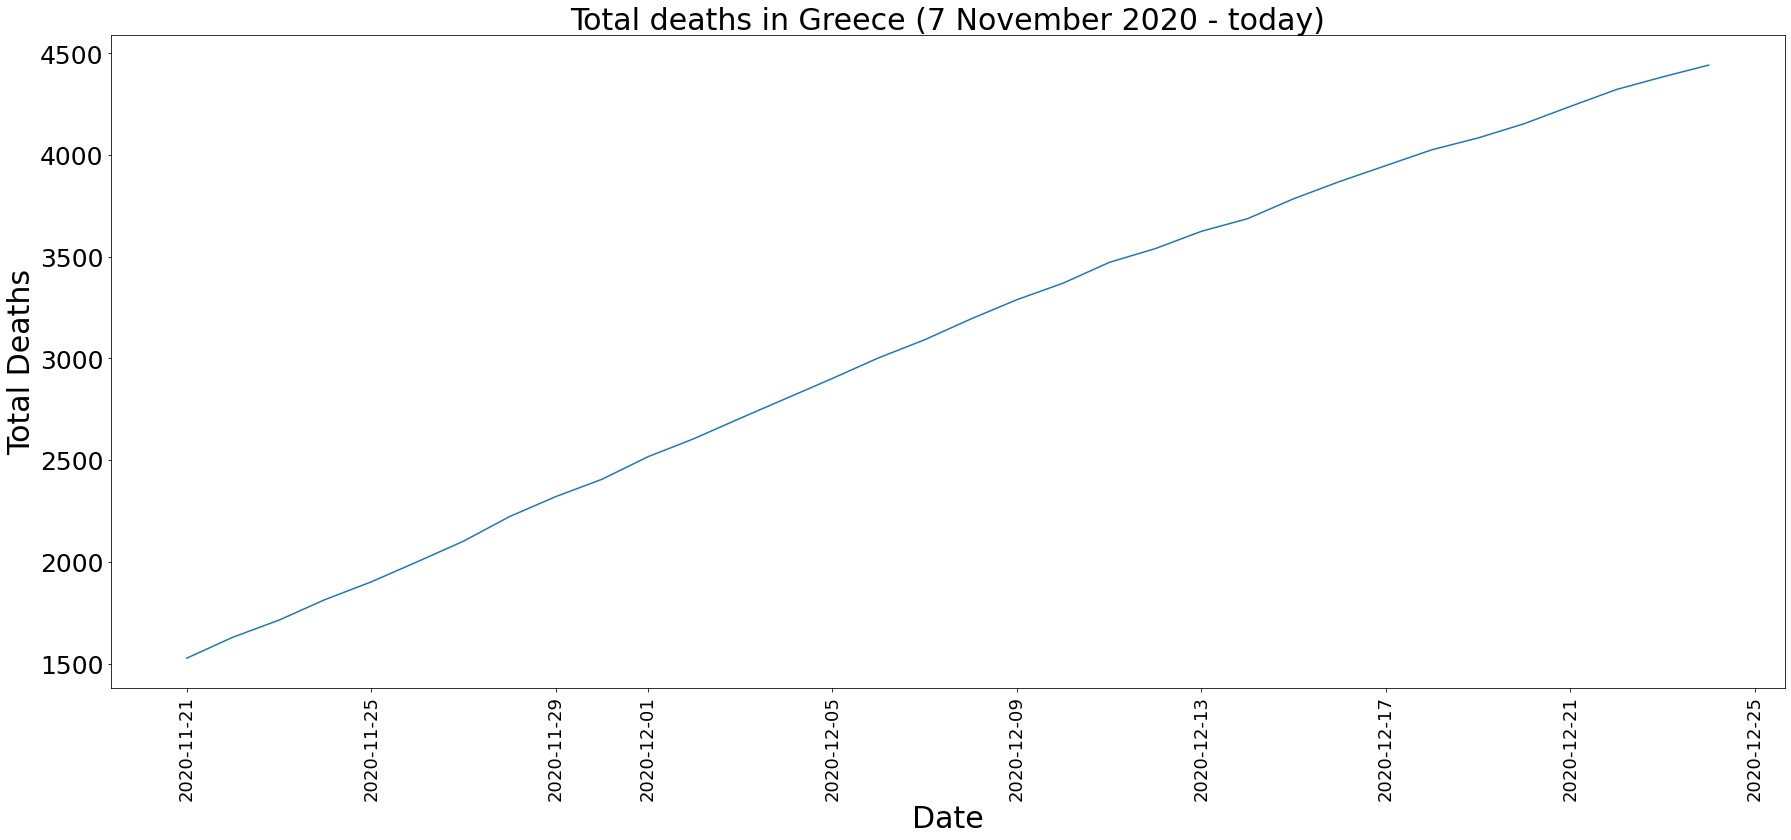

In [17]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [18]:
from fbprophet import Prophet

In [19]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [20]:
new_deaths.tail()

,Date_reported,New_deaths
29,2020-12-20,70
30,2020-12-21,85
31,2020-12-22,83
32,2020-12-23,62
33,2020-12-24,55


In [21]:
new_deaths.columns=['ds','y']

In [22]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
34,2020-12-25,81.131866,63.215287,101.038736
35,2020-12-26,68.858721,51.494680,86.910599
36,2020-12-27,69.658796,49.465733,87.919561
37,2020-12-28,59.258993,40.489234,77.519390


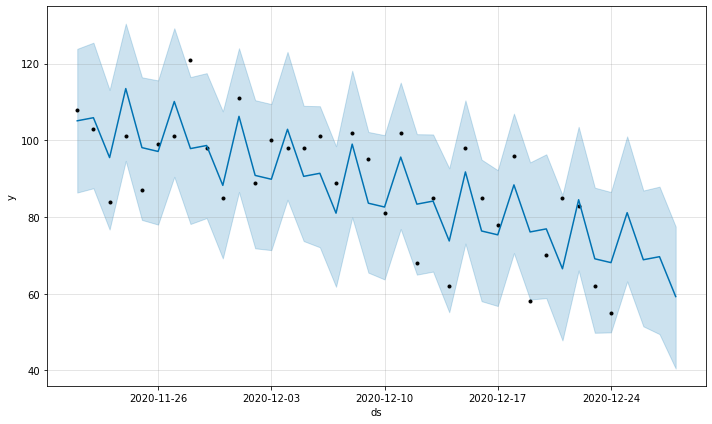

In [24]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

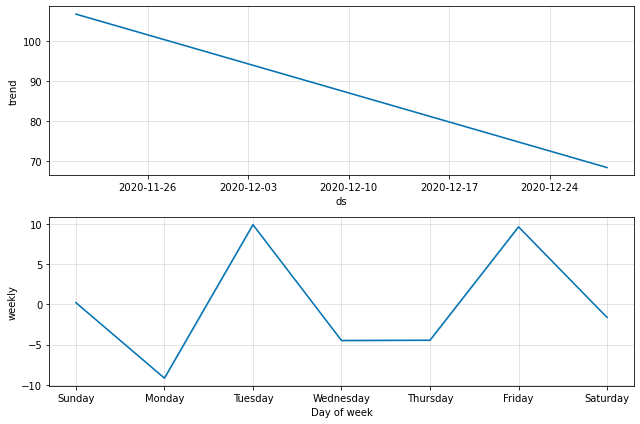

In [25]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [26]:
new_cases.tail()

,Date_reported,New_cases
29,2020-12-20,588
30,2020-12-21,526
31,2020-12-22,853
32,2020-12-23,934
33,2020-12-24,873


In [27]:
new_cases.columns=['ds','y']

In [28]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
34,2020-12-25,733.395636,478.474797,990.281555
35,2020-12-26,604.879727,346.003781,874.236461
36,2020-12-27,72.878216,-191.820350,330.755537
37,2020-12-28,67.278171,-202.028204,329.947152


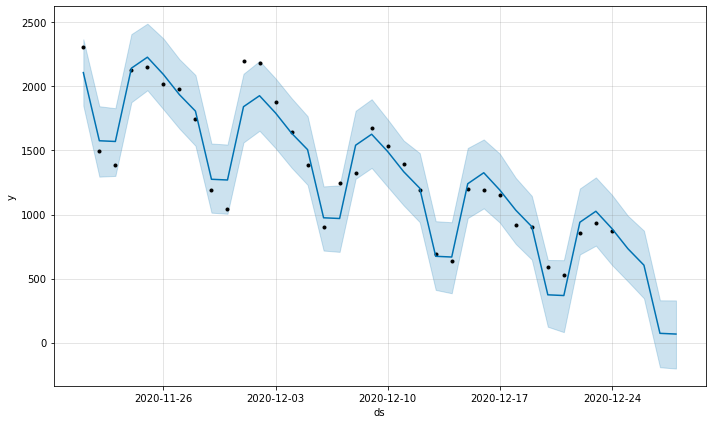

In [30]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

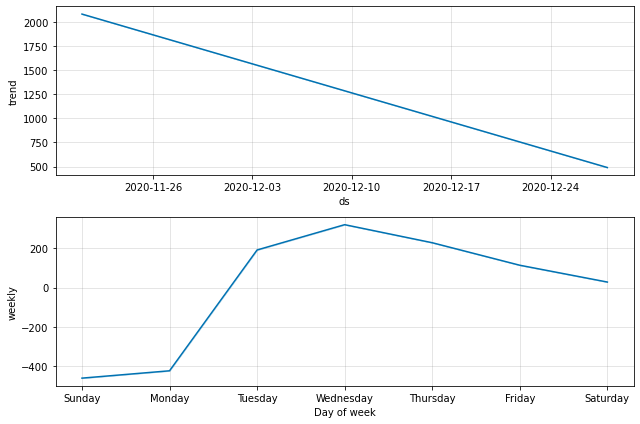

In [31]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)